# ANÁLISE DOS ACIDENTES FATAIS NO ESTADO DE SÃO PAULO (2015-2023)

![alt text](https://transformacoes.observatoriodasmetropoles.net.br/wp-content/uploads/2015/06/46dab725dcec21832ff6fc55e05fcea7_L.jpg)


## INTRODUÇÃO

---

Muito se tem discutido acerca do problema da mobilidade urbana em SP. E nessa análise exploratória iremos explorar uma parte importante do assunto: os acidentes fatais.


Antes de tudo, gostaria de deixar claro que esses números de mortes não são **apenas** números, são pessoas, famílias, amigos e histórias que hoje estão só nas memórias de seus entes queridos. Gostaria de deixar aqui nessa conclusão um pedido de conscientização sobre acidentes que ocorrem no trânsito e um luto em respeito às famílias, amigos e pessoas próximas.

Quando trabalhamos com dados, temos um panorama geral do que está acontecendo e do que aconteceu, e a importância de trabalhar com dados em cima desse assunto é podermos cobrar políticas públicas para a redução do problema, no caso, as mortes por acidentes no Estado de São Paulo.

ps: Não será tratado da média anual de mortes ocasionadas por esses acidentes, mas sim do total de mortes que ocorreram nos últimos oito anos.

ps: Foram escolhida a cor preta para alguns gráficos (os que não precisei reutilizar as cores) como forma de prestar LUTO.

A base de dados utilizada se encontra em: http://www.respeitoavida.sp.gov.br/

## Pré-processamento

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Desativar todos os warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
caminho_arquivo = '/content/drive/MyDrive/dados/obitos_publico.csv'
df = pd.read_csv(caminho_arquivo, encoding='iso-8859-1', sep=';')

df.head()

,Id da Delegacia (RDO),Número do Bo (RDO),Ano do BO (RDO),Data do Óbito,Data do Acidente,Tipo de via,Dia do óbito,Mês do Óbito,Mês Óbito Descrição,Ano do Óbito,...,Tipo do veículo da vítima,Tipo de vítima,Local do óbito,Tipo de acidente,Sub Tipo do Acidente,Sexo,Faixa etária,Idade da vítima,Outro Veículo Envolvido,Tempo entre o Acidente e o Óbito
0,40106,1008500934,2023,2023-12-31,2023-12-30,Rodovias,31,12,DEZEMBRO,2023,...,MOTOCICLETA,CONDUTOR,ESTABELECIMENTO DE SAUDE,COLISAO,TRANSVERSAL,MASCULINO,45-49,49,MOTOCICLETA,Até 30 dias
1,130517,1008506305,2023,2023-12-31,2023-12-31,Rodovias,31,12,DEZEMBRO,2023,...,PEDESTRE,PEDESTRE,VIA,ATROPELAMENTO,ANDANDO NA VIA / ACOSTAMENTO,MASCULINO,25-29,26,CAMINHAO,Até 30 dias
2,30418,1008506461,2024,2023-12-31,2023-12-31,Rodovias,31,12,DEZEMBRO,2023,...,PEDESTRE,PEDESTRE,VIA,ATROPELAMENTO,CRUZANDO A VIA,MASCULINO,NAO DISPONIVEL,NAO DISPONIVEL,AUTOMOVEL,Até 30 dias
3,330104,1008505982,2023,2023-12-31,2023-12-31,Rodovias,31,12,DEZEMBRO,2023,...,AUTOMOVEL,CONDUTOR,VIA,COLISAO,LATERAL,MASCULINO,45-49,48,CAMINHAO,Até 30 dias
4,100930,1008506084,2023,2023-12-31,2023-12-31,Vias Municipais,31,12,DEZEMBRO,2023,...,MOTOCICLETA,CONDUTOR,VIA,CHOQUE,POSTE,MASCULINO,30-34,30,NÃO HÁ,Até 30 dias


In [ ]:
df.shape

(50254, 34)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50254 entries, 0 to 50253
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id da Delegacia (RDO)             50254 non-null  int64  
 1   Número do Bo (RDO)                50254 non-null  int64  
 2   Ano do BO (RDO)                   50254 non-null  int64  
 3   Data do Óbito                     50254 non-null  object 
 4   Data do Acidente                  50254 non-null  object 
 5   Tipo de via                       50254 non-null  object 
 6   Dia do óbito                      50254 non-null  int64  
 7   Mês do Óbito                      50254 non-null  int64  
 8   Mês Óbito Descrição               50254 non-null  object 
 9   Ano do Óbito                      50254 non-null  int64  
 10  Ano/Mês do Óbito                  50254 non-null  float64
 11  Dia da Semana                     50254 non-null  object 
 12  Hora

Para alguns gráficos que será exibido, filtraremos os dados que constam como 'NÃO DISPONIVEL' nas colunas especificas analisadas


As cores e as paletas utilizadas foram selecionadas da documentação oficial e um site de cores em hexadecimal


Paletas https://seaborn.pydata.org/tutorial/color_palettes.html


Cores https://celke.com.br/artigo/tabela-de-cores-html-nome-hexadecimal-rgb


In [ ]:
# df_remove_genero = df.loc[(df['Sexo'] == 'NAO DISPONIVEL')]
# df = df.drop(df_remove_genero.index)

# df_remove_veiculo = df.loc[(df['Tipo do veículo da vítima'] == 'NAO DISPONIVEL')]
# df = df.drop(df_remove_veiculo.index)

# df_remove_vitima = df.loc[(df['Tipo de vítima'] == 'NAO DISPONIVEL')]
# df = df.drop(df_remove_vitima.index)

# df_remove_acidente = df.loc[(df['Tipo de acidente'] == 'NAO DISPONIVEL')]
# df = df.drop(df_remove_acidente.index)

# df_remove_sub_acidente = df.loc[(df['Sub Tipo do Acidente'] == 'NAO DISPONIVEL')]
# df = df.drop(df_remove_sub_acidente.index)
#

#Cores
cores_hora = ['#FFD700','#FFD700','#8B0000','#FFD700','#C0C0C0']
cores_dia = ['#8B0000','#FFD700','#FFD700','#FFD700','#FFD700','#FFA500','#8B0000']
cores_genero = ['#87CEFA','#FF69B4']
cores_tipo_vitima = ["#9b59b6", "#e74c3c", "#2ecc71"]

#Paletas
paleta_tipo_veiculo = sns.color_palette("husl", 7)
paleta_degrade=sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.75, reverse=True)
paleta_hora = sns.color_palette(cores_hora)
paleta_tipo_vitima = sns.color_palette(cores_tipo_vitima)
paleta_genero = sns.color_palette(cores_genero)
paleta_dia = sns.color_palette(cores_dia)


Quando analisamos um problema social devemos fazer muitas perguntas, porque geralmente são problemas complexos que resultaram de inúmeros fatores e que afetam inúmeras pessoas. Então dado as limitações do nosso conjunto de dados, responderei quatro perguntas:

*  QUEM?
*  ONDE?
*  QUANDO?
*  COMO?

## COM QUEM ACONTECEM?

---
Entender **quem** são as pessoas envolvidas no problema social em que estamos analisando é o primeiro passo para pensarmos em resolvê-lo, podendo direcionar o foco das políticas públicas e/ou da conscientização.
Olhando nosso dataset, vemos que as informações sobre as vítimas são:

*   Gênero
*   Idade
*   Tipo de vítima
*   Veículo em que estavam

###   Gênero

In [ ]:
df_remove_genero = df.loc[(df['Sexo'] == 'NAO DISPONIVEL')]
df_genre = df.drop(df_remove_genero.index)

In [ ]:
df_genre.Sexo.value_counts()

MASCULINO         38690
FEMININO           8362
NAO DISPONIVEL      467
Name: Sexo, dtype: int64

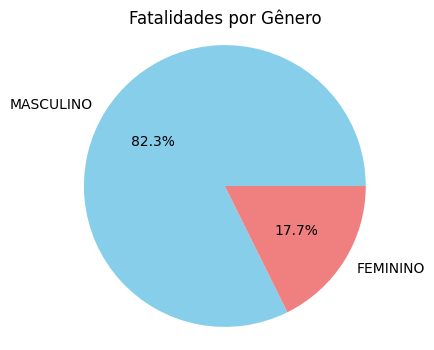

In [ ]:
plt.figure(figsize=(4, 4))
df_genre['Sexo'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Fatalidades por Gênero')
plt.ylabel('')
plt.axis('equal')
plt.show()

Agora já sabemos que as maiores vítimas dos acidentes de trânsito em São Paulo são os homens. Mas que homens?

Os dados nos permitem também analisar a distribuição das idades

In [ ]:
# Removendo os valores ausentes da idade das vítimas
df_remove_idade = df.loc[(df['Idade da vítima'] == 'NAO DISPONIVEL')]
df_genre = df_genre.drop(df_remove_idade.index)
df_genre['Idade da vítima'] = df_genre['Idade da vítima'].astype(int)

In [ ]:
df_genre['Idade da vítima'].describe()

count    47519.000000
mean        41.401187
std         18.525212
min          0.000000
25%         26.000000
50%         39.000000
75%         54.000000
max        119.000000
Name: Idade da vítima, dtype: float64

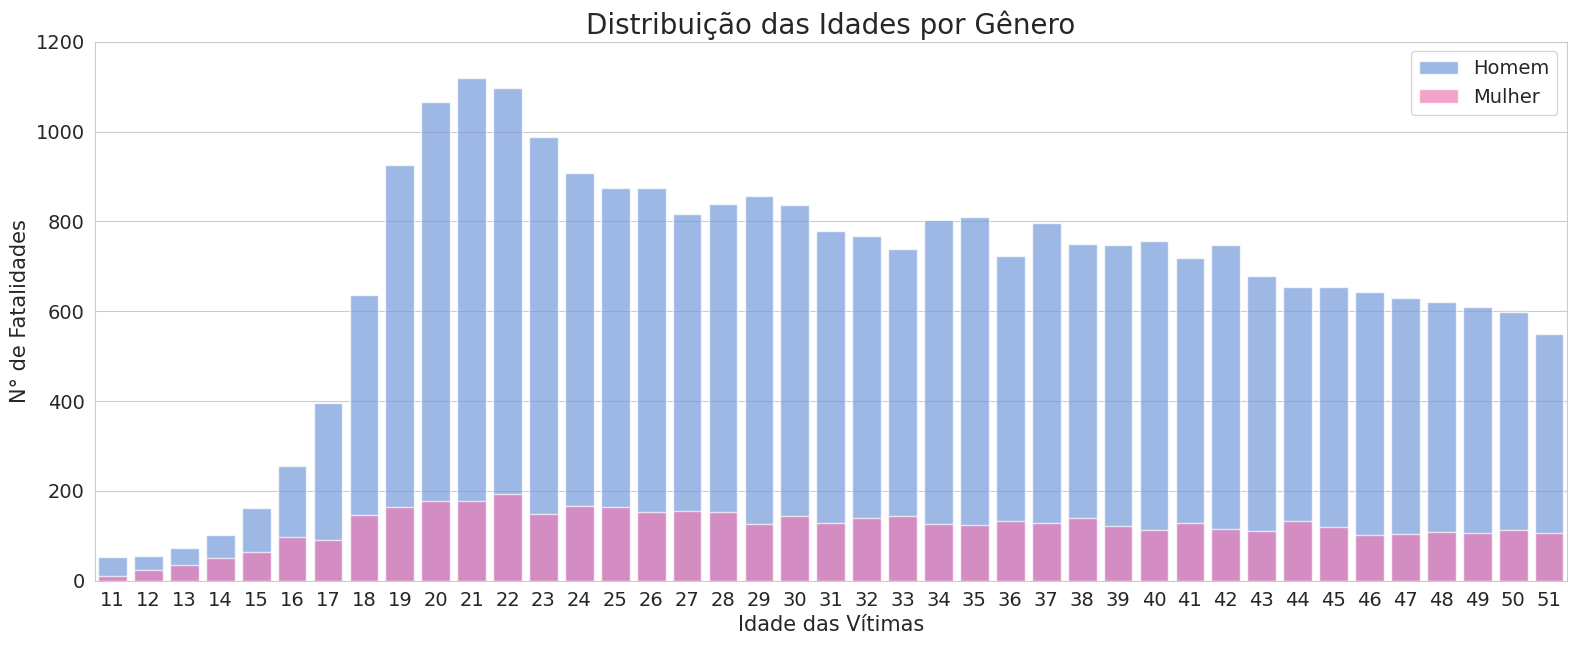

In [ ]:
fig = plt.figure(figsize=(19, 7))
sns.set_style('whitegrid')

# Selecionando a idades das vítimas masculinas e femininas
idades_homem = df_genre[df_genre['Sexo'] == 'MASCULINO']['Idade da vítima'].astype(int)
idades_mulher = df_genre[df_genre['Sexo'] == 'FEMININO']['Idade da vítima'].astype(int)

# Plotando a contagem das idades para homens e mulheres
sns.countplot(x=idades_homem, color='#6495ED', label='Homem', alpha=0.7)
sns.countplot(x=idades_mulher, color='#FF69B4', label='Mulher', alpha=0.7)
plt.xlim(10.5, 51.5)
plt.xlabel('Idade das Vítimas', fontsize=15)
plt.ylabel('N° de Fatalidades', fontsize=15)
plt.title('Distribuição das Idades por Gênero', fontsize=20)
plt.ylim(0, 1200)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.show()

In [ ]:
print('Homem\n', idades_homem.describe(), '\nMulher\n', idades_mulher.describe())


Homem
 count    38690.000000
mean        40.815870
std         17.707046
min          0.000000
25%         26.000000
50%         38.000000
75%         53.000000
max        119.000000
Name: Idade da vítima, dtype: float64 
Mulher
 count    8362.000000
mean       44.168979
std        21.691838
min         0.000000
25%        26.000000
50%        42.000000
75%        61.000000
max        99.000000
Name: Idade da vítima, dtype: float64


Como podemos observar, os que mais morrem estão entre os 19 e 23 anos de idade. E depois disso, não varia muito, tendo sua media igual a 40,75 anos (sim, a estatística nos permite isso) para os homens e 43,95 anos para as mulheres.


> OBS: os dados para média agregam todas as idades do dataset, enquanto o gráfico só mostra até 50 anos de idade. Essa limitação foi escolhida para ficar mais simples do leitor observar e entender o gráfico.



Agora iremos analisar o tipo de vítima sendo classificado em: Condutor, pedestre e passageiro.

Acredito que essa informação tenha devida relevância para resolver o problema em questão, pois entendemos como estão distribuídas as mortes. Em breve veremos os veículos de cada um e teremos conclusões mais interessantes

### Classificação das vítimas

In [ ]:
df_remove_vitima = df.loc[(df['Tipo de vítima'] == 'NAO DISPONIVEL')]
df_vitima = df.drop(df_remove_vitima.index)

In [ ]:
#Porcentagem
df_vitima['Tipo de vítima'].value_counts()/df_vitima['Tipo de vítima'].value_counts().sum()*100

CONDUTOR      60.560359
PEDESTRE      26.760414
PASSAGEIRO    12.679228
Name: Tipo de vítima, dtype: float64

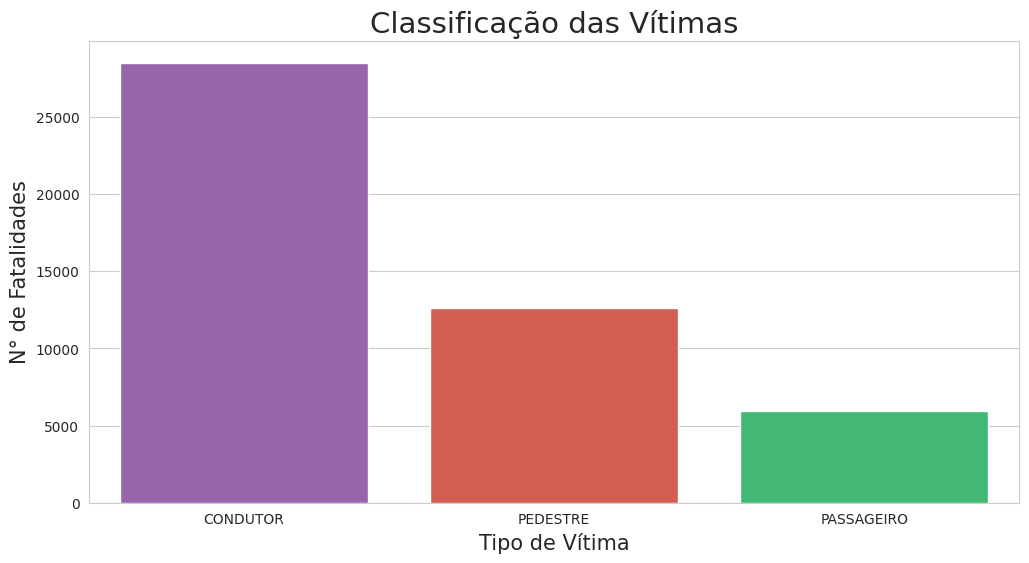

In [ ]:
# Plotando gráfico de barras com os tipos de vitimas
fig = plt.figure(figsize=(12, 6))
total = df_vitima['Tipo de vítima'].value_counts()

sns.countplot(x=df_vitima['Tipo de vítima'], palette=paleta_tipo_vitima)
plt.xlim(-0.5, 2.5)
plt.title('Classificação das Vítimas', fontsize=21)
plt.xlabel('Tipo de Vítima', fontsize=15)
plt.ylabel('N° de Fatalidades', fontsize=15)
plt.show()

Como podemos observar, os condutores morrem muito mais que os pedestres e os passageiros, mas ainda podemos FAZER MAIS (sempre dá para fazer mais), vamos os separarar por gênero

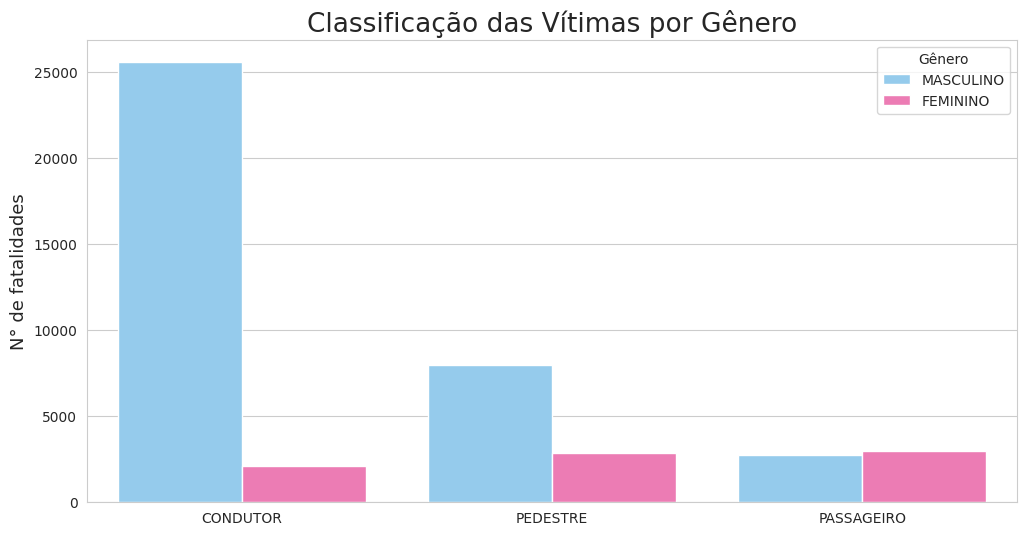

In [ ]:
# Removendo os valores ausenetes do genêro
df_remove_genero = df_vitima.loc[(df_vitima['Sexo'] == 'NAO DISPONIVEL')]
df_vitima = df_vitima.drop(df_remove_genero.index)

fig = plt.figure(figsize=(12,6))
sns.countplot(x = 'Tipo de vítima',
              hue = 'Sexo',
              palette = paleta_genero,
              data = df_vitima)
plt.xlabel(' ')
plt.xlim(-0.5,2.5)
plt.legend(title='Gênero')
plt.ylabel('N° de fatalidades',fontsize=13)
plt.title('Classificação das Vítimas por Gênero',fontsize=19);

In [ ]:
# Removendo os valores ausentes da idade das vítimas
df_remove_idade = df_vitima.loc[(df_vitima['Idade da vítima'] == 'NAO DISPONIVEL')]
df_vitima = df_vitima.drop(df_remove_idade.index)
df_vitima['Idade da vítima'] = df_vitima['Idade da vítima'].astype(int)


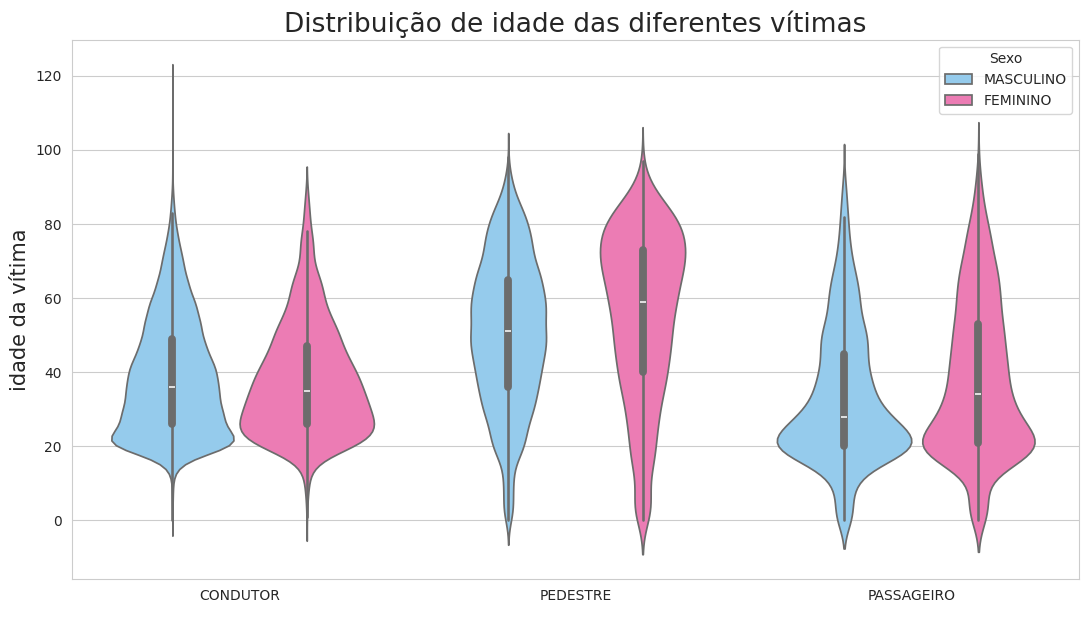

In [ ]:
# Plotando violinplot com a idade das vitimas e o tipo de vítima da fatalidade
fig = plt.figure(figsize=(13,7))
sns.violinplot(x='Tipo de vítima', y='Idade da vítima',hue='Sexo',palette=paleta_genero,data = df_vitima)
plt.xlim(-0.5,2.5)
plt.title('Distribuição de idade das diferentes vítimas',fontsize=19)
plt.xlabel(' ')
plt.ylabel('idade da vítima',fontsize=15);

Nota-se que os jovens são os condutores que mais morrem, assim como os passageiros. Porém a distribuição dos pedestres se dá de maneira diferente, os mais velhos são os pedestres que mais morrem, na faixa de 40 a 60 anos.

### Veículos das vítimas

In [ ]:
# Removendo os valores ausentes na coluna 'Tipo do veículo da vítima'
df_remove_veiculo = df.loc[(df['Tipo do veículo da vítima'] == 'NAO DISPONIVEL')]
df_veiculo = df.drop(df_remove_veiculo.index)

In [ ]:
#Porcentagem dos tipos de veículos das vítimas
round(df_veiculo['Tipo do veículo da vítima'].value_counts()/(df_veiculo['Tipo do veículo da vítima'].value_counts().sum())*100,2)


MOTOCICLETA    36.93
PEDESTRE       26.06
AUTOMOVEL      25.30
BICICLETA       6.85
CAMINHAO        3.47
ONIBUS          0.86
OUTROS          0.52
Name: Tipo do veículo da vítima, dtype: float64

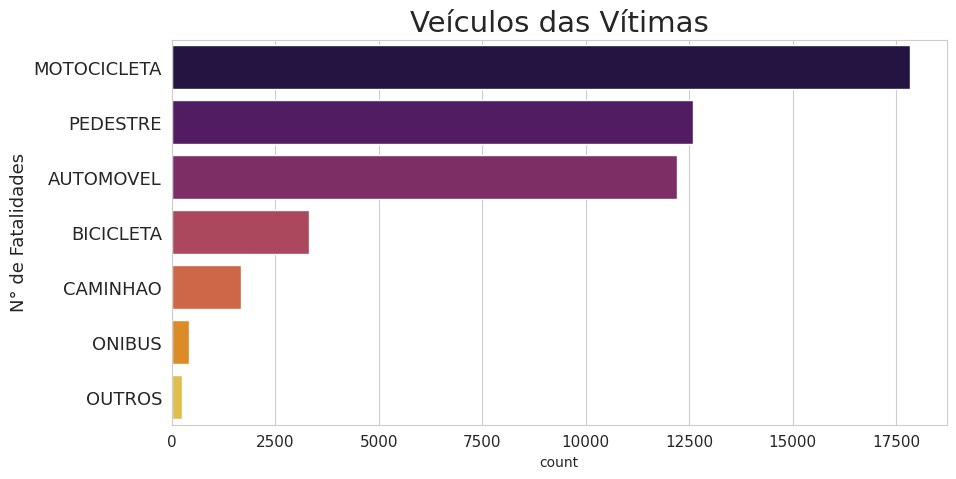

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.countplot(y='Tipo do veículo da vítima',
              order = df_veiculo['Tipo do veículo da vítima'].value_counts().index,
              palette = 'inferno',
              data = df_veiculo)

plt.title('Veículos das Vítimas',fontsize=21)
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)
plt.ylabel('N° de Fatalidades',fontsize=13)
fig.savefig('Acidente_SP_veiculos.png');

Observamos nessas análises que os motociclistam (34,5%) correm grande perigo no Estado de São Paulo, assim como os pedestres (28,2%) e quem viaja de automóvel (25,8%).

Agora separaremos novamente pelo gênero, para estudarmos as **idades das vítimas dado o tipo de veículo**

In [ ]:
# Removendo os valores ausentes da idade das vítimas
df_remove_idade = df_veiculo.loc[(df_veiculo['Idade da vítima'] == 'NAO DISPONIVEL')]
df_veiculo = df_veiculo.drop(df_remove_idade.index)
df_veiculo['Idade da vítima'] = df_veiculo['Idade da vítima'].astype(int)

# Removendo os valores ausenetes do gênero
df_remove_genero = df_veiculo.loc[(df_veiculo['Sexo'] == 'NAO DISPONIVEL')]
df_veiculo = df_veiculo.drop(df_remove_genero.index)


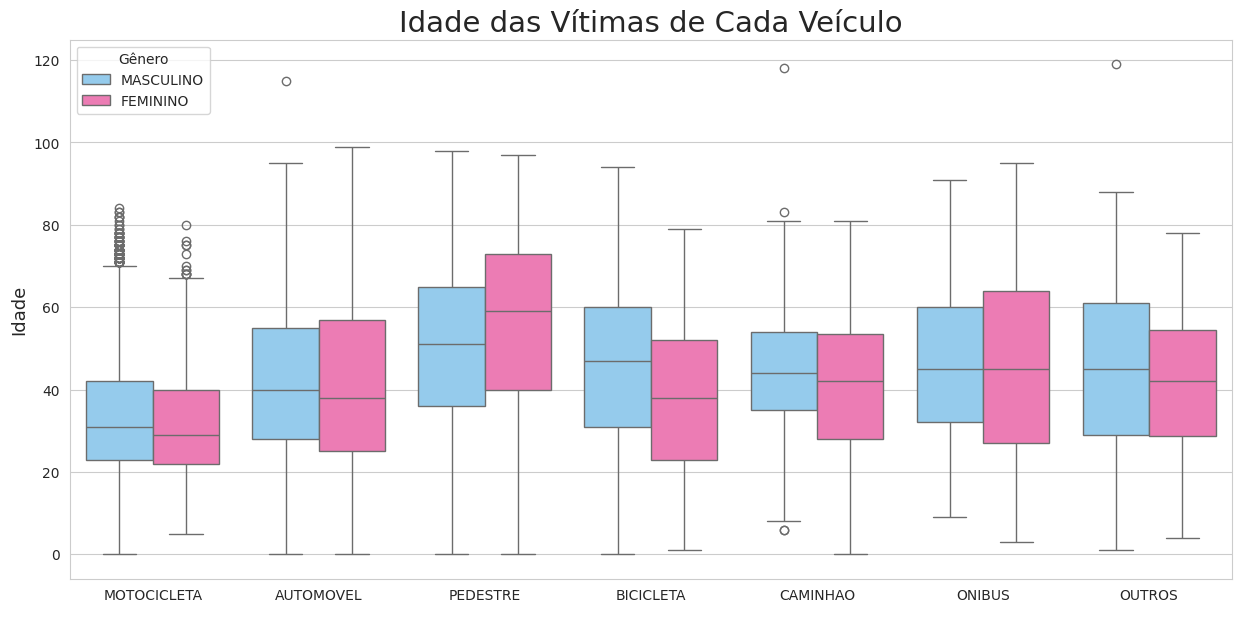

In [ ]:
fig =plt.figure(figsize=(15,7))
sns.boxplot(x = 'Tipo do veículo da vítima',
            y = 'Idade da vítima',
            hue = 'Sexo',
            palette = paleta_genero,
            order = df_veiculo['Tipo do veículo da vítima'].value_counts().index,
            data = df_veiculo)
plt.title('Idade das Vítimas de Cada Veículo',fontsize=21)
plt.xlabel(' ')
plt.ylabel('Idade',fontsize=13)
plt.legend(title='Gênero');

A partir desse gráfico conseguimos tirar algumas conclusões interessantes:

*   Os motociclistas costumam ser mais novos que os usuários de outros veículos. Isso pode nos ajudar a explicar o alto número de morte dos jovens nos acidentes de trânsito.
*   Os pedestres costumam ser mais velhos que os usuários de outros veículos. Mas ainda vemos muitos idosos (+65) morrendo de motocicletas em acidentes.

Agora que já conhecemos os perfis de quem morre nos acidentes de trânsito em SP, podemoms partir para a próxima etapa: saber onde essas pessoas morrem




## **ONDE ACONTECEM?**

---
Saber onde acontece é de suma importância quando estamos estudando um país, região, Estado (como é aqui no nosso caso), Município ou o que for. Estudar essa distribuição geográfica faz com que possamos nos localizar no conjunto de dados.


### Mapa

In [ ]:
# !pip install folium

In [ ]:
df_mapa = df.copy()

In [ ]:
df_remove_geo = df_mapa.loc[(df_mapa['LAT_(GEO)'] == 'NAO DISPONIVEL')]
df_mapa = df_mapa.drop(df_remove_geo.index)

In [ ]:
df_remove_geo = df_mapa.loc[(df_mapa['LONG_(GEO)'] == 'NAO DISPONIVEL')]
df_mapa = df_mapa.drop(df_remove_geo.index)

In [ ]:
# Transformando as variaveis da coluna ('LAT e LONG') em tipo INT para poder plotar no gráfico
df_mapa['LAT_(GEO)'] = df_mapa['LAT_(GEO)'].str.replace(r'[^0-9.-]+', '').str.replace(',', '.')
df_mapa['LONG_(GEO)'] = df_mapa['LONG_(GEO)'].str.replace(r'[^0-9.-]+', '').str.replace(',', '.')
df_mapa['LAT_(GEO)'] = pd.to_numeric(df_mapa['LAT_(GEO)'], errors='coerce')
df_mapa['LONG_(GEO)'] = pd.to_numeric(df_mapa['LONG_(GEO)'], errors='coerce')

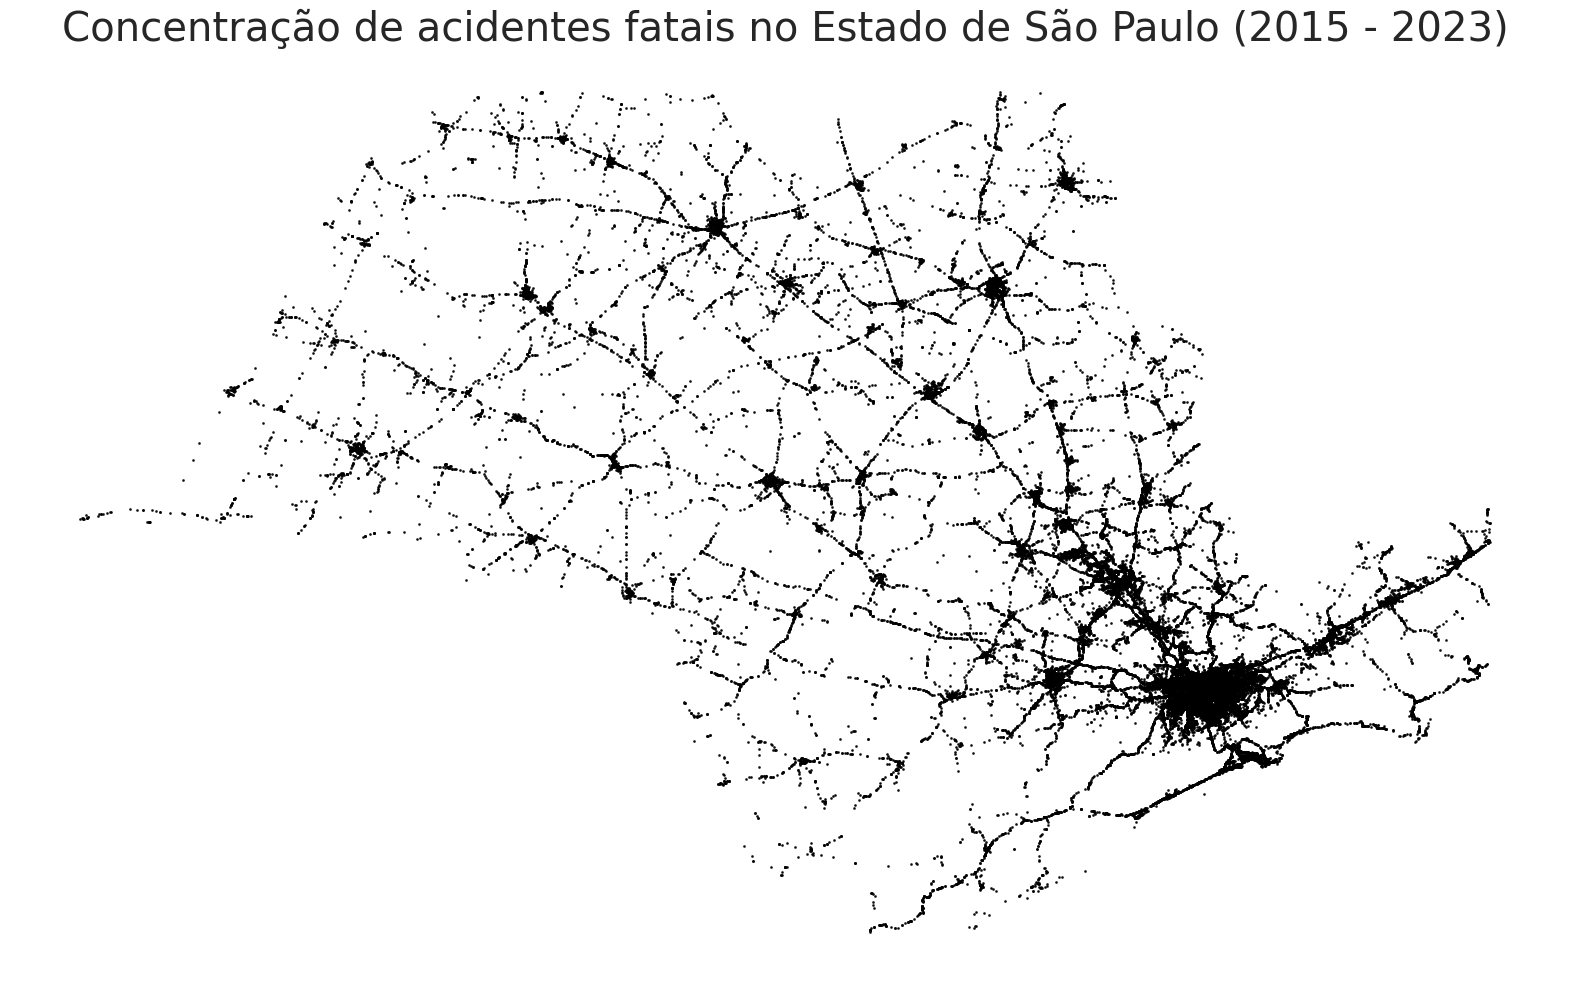

In [ ]:
# Filtrando os dados para remover valores ausentes e limitando a área geográfica (evitando dados errados digitados errados)
df_mapa = df_mapa.dropna(subset=['LAT_(GEO)', 'LONG_(GEO)'])
df_mapa = df_mapa[(df_mapa['LAT_(GEO)'] > -25) & (df_mapa['LAT_(GEO)'] < -20) & (df_mapa['LONG_(GEO)'] > -53) & (df_mapa['LONG_(GEO)'] < -45)]

# Plotando o gráfico
plt.figure(figsize=(20, 12))
plt.scatter(df_mapa['LONG_(GEO)'], df_mapa['LAT_(GEO)'], s=1, c='black', alpha=0.8)

plt.title('Concentração de acidentes fatais no Estado de São Paulo (2015 - 2023)', fontsize=29)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
sns.despine(left=True,bottom=True,right=True,top=True);
plt.grid(True)
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap

# Criando um mapa centrado nas coordenadas de São Paulo
mapa = folium.Map(location=[-23.5505, -46.6333], zoom_start=7)

# Adicionando um HeatMap dos acidentes
heat_map = HeatMap(list(zip(df_mapa['LAT_(GEO)'], df_mapa['LONG_(GEO)'])), min_opacity=0.3, radius=10.5)
mapa.add_child(heat_map)

mapa

In [185]:
municipio = df['Município'].value_counts().head(5)
# df['Município'].value_counts()/ df['Município'].value_counts().sum()*100
print(f'Os municípios de Sâo Paulo com mais mortes decorridas de acidentes de trânsito (2015-2023):\n{municipio}')

Os municípios de Sâo Paulo com mais mortes decorridas de acidentes de trânsito (2015-2023):
SAO PAULO         8145
CAMPINAS          1366
GUARULHOS         1240
SOROCABA           826
RIBEIRAO PRETO     796
Name: Município, dtype: int64


### Vias
Agora que já sabemos onde as mortes se concentram, veremos 2 tipos comuns de vias: As vias municipais e as rodoviais. Onde acontecem mais mortes por acidentes?

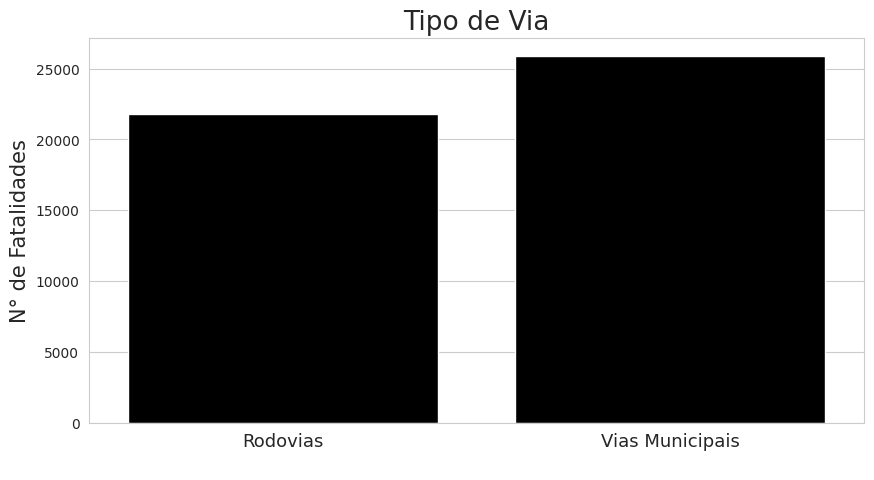

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Tipo de via', color='black', data=df)
plt.title('Tipo de Via',fontsize=19)
plt.ylabel('N° de Fatalidades',fontsize=15)
plt.xlabel(' ')
plt.xlim(-0.5,1.5)
plt.xticks(fontsize=13);

As vias municipais se mostram mais perigosas do que as rodovias, mas podemos fazer outra pergunta: mais perigosa **para quem?**

Nos seguintes gráficos, separaremos os números de mortes nas vias municipais e nas rodovias por:

*   Gênero
*   Tipo de vítima
*   Veículo da vítima



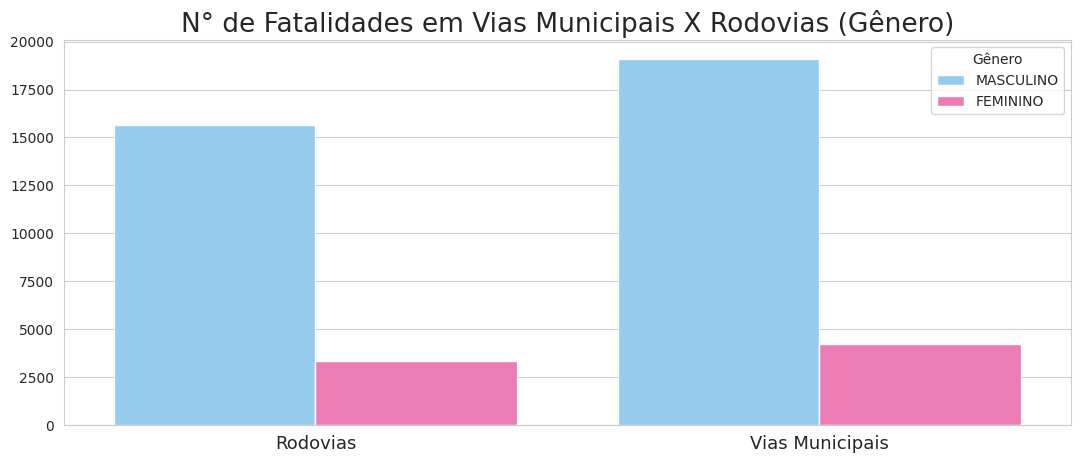

In [ ]:
fig = plt.figure(figsize=(13,5))
sns.countplot(x = 'Tipo de via',
              hue = 'Sexo',
              palette = paleta_genero,
              data = df_genre)
plt.xlim(-0.5,1.5)
plt.ylabel('')
plt.xlabel('')
plt.xticks(fontsize=13)
plt.title('N° de Fatalidades em Vias Municipais X Rodovias (Gênero)',fontsize=19)
plt.legend(title='Gênero', loc='upper right', labels=['MASCULINO', 'FEMININO']);

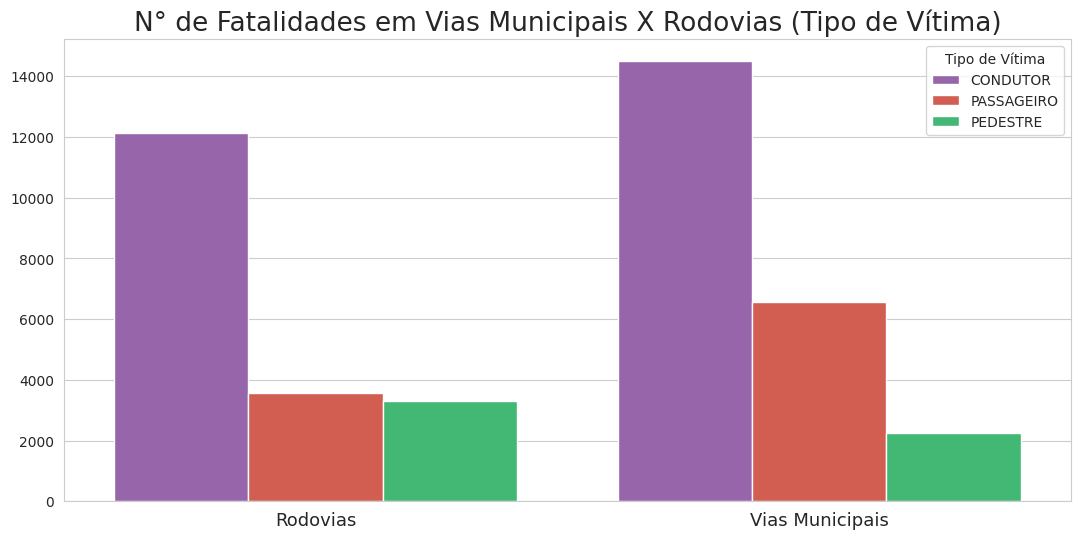

In [ ]:
fig = plt.figure(figsize=(13,6))
sns.countplot(x = 'Tipo de via',
              hue = 'Tipo de vítima',
              palette = paleta_tipo_vitima,
              data = df_vitima)
plt.xlim(-0.5,1.5)
plt.xlabel('',fontsize=13)
plt.ylabel('')
plt.xticks(fontsize=13)
plt.title('N° de Fatalidades em Vias Municipais X Rodovias (Tipo de Vítima)',fontsize=19)
plt.legend(title='Tipo de Vítima', loc='upper right', labels=['CONDUTOR', 'PASSAGEIRO','PEDESTRE']);

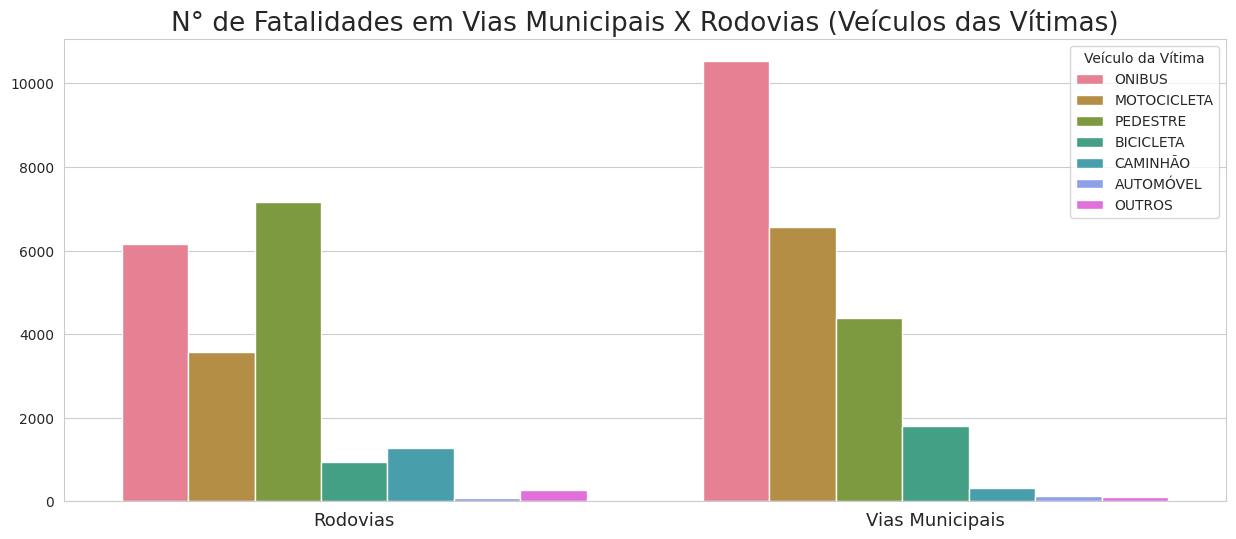

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x = 'Tipo de via',
              hue = 'Tipo do veículo da vítima',
              palette = paleta_tipo_veiculo,
              data = df_veiculo)
plt.xlim(-0.5,1.5)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=13)
plt.title('N° de Fatalidades em Vias Municipais X Rodovias (Veículos das Vítimas)',fontsize=19)
plt.legend(title='Veículo da Vítima', loc='upper right', labels=['ONIBUS', 'MOTOCICLETA','PEDESTRE','BICICLETA','CAMINHÃO','AUTOMÓVEL','OUTROS']);

No terceiro gráfico vemos um resultado interessante. Embora o número de motociclistas tenha sido maior que o de automóveis, nas rodovias não acontece isso. O número de mortes com automóveis se mostra maior do que com motocicletas.

Entender onde ocorre as fatalidades informam aos formuladores de políticas públicas onde devem atuar para reduzir os números de acidentes. Traçar planos eficientes são necessários para atacar o problema, e devemos fazer isso nos baseando em dados estatísticos.

Agora iremos explorar a relação temporal. Estudaremos, então, quando essas fatalidades acontecem

## QUANDO ACONTECEM

---
Localizar eventos na dimensão temporal nos permite traçar um panorama diferente, pois o tempo é uma informação que vemos o tempo todo, deixá-lo de lado é excluir uma parte crucial da sua análise. Pensar em problemas inclui pensar no "quando aconteceu".


### Mês do ano

In [ ]:
df['Mês do Óbito'].value_counts()

12    4491
7     4478
10    4442
5     4367
8     4344
9     4331
6     4252
3     4199
11    4043
4     3974
1     3756
2     3577
Name: Mês do Óbito, dtype: int64

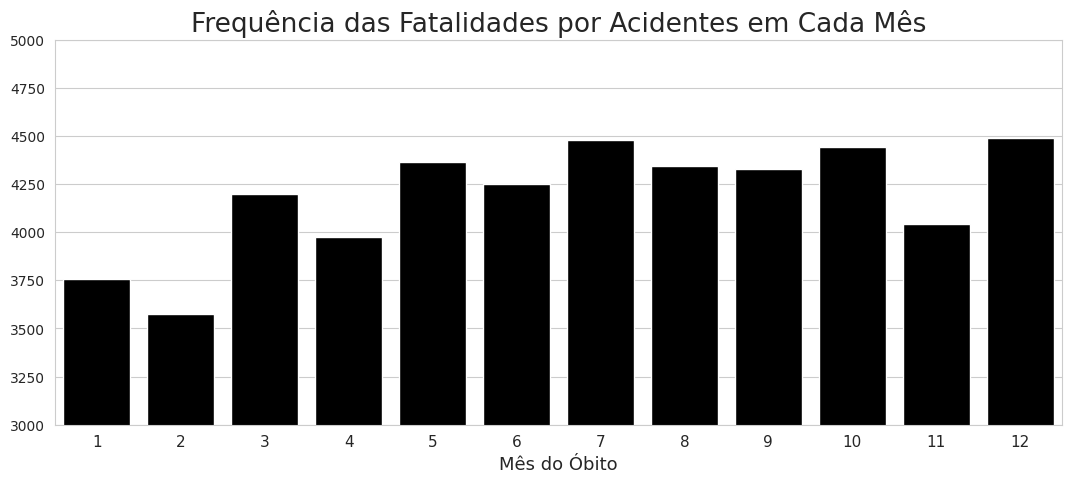

In [ ]:
#Agora interpretando no gráfico
fig = plt.figure(figsize=(13,5))
plt.title('Frequência das Fatalidades por Acidentes em Cada Mês',fontsize=19)
sns.countplot(x = 'Mês do Óbito', color='black' , data = df)
plt.ylim(3000, 5000)
plt.ylabel('')
plt.xlabel('Mês do Óbito',fontsize=13)
plt.xticks(fontsize=11);

### Dias da semana e turnos do dia
Agora que sabemos o mês em que mais ocorreram mortes, iremos analisar quais os dias da semana e turnos do dia essas fatalidades são ocasionadas.

In [ ]:
#Porcentagem de morte por turno e dia da semana
round(df['Turno'].value_counts()/df['Turno'].value_counts().sum()*100,2)
#df['Dia da Semana'].value_counts()/df['Dia da Semana'].value_counts().sum()*100

NOITE             33.94
TARDE             21.35
MADRUGADA         19.42
MANHA             17.70
NAO DISPONIVEL     7.59
Name: Turno, dtype: float64

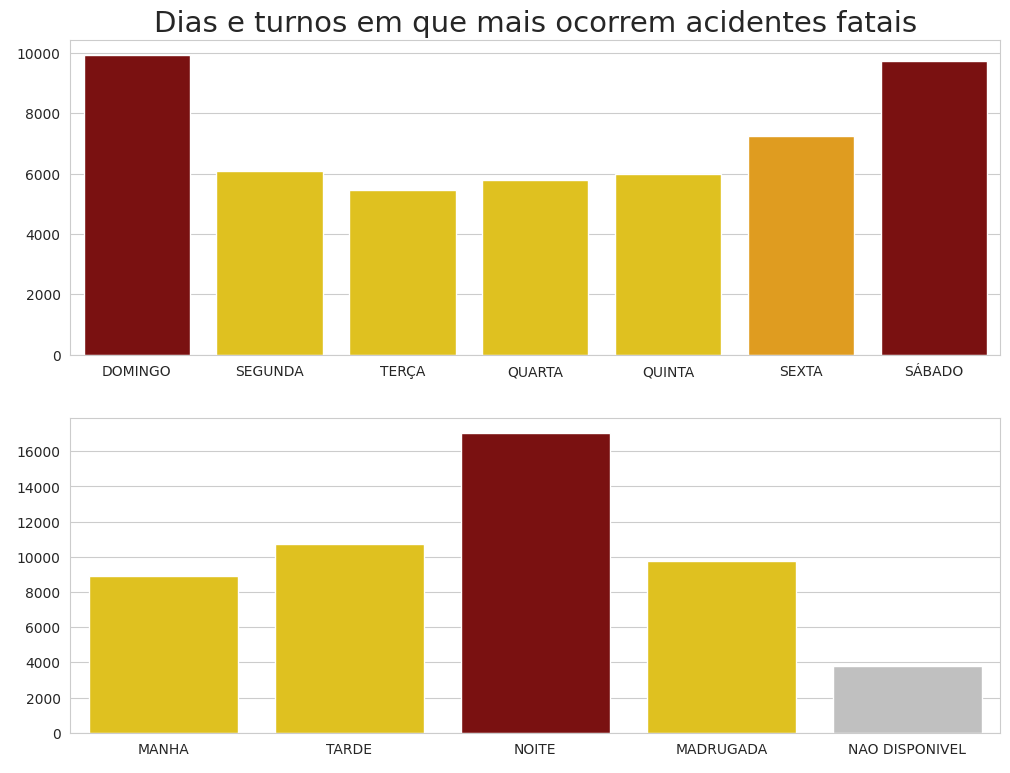

In [ ]:
fig = plt.figure(figsize=(12,9))
plt.subplot(2,1,2)
plt.xlabel(' ',fontsize=1)
plt.ylabel(' ',fontsize=1)
turnos = df['Turno'].value_counts()
sns.countplot(x = 'Turno',
              order = ['MANHA','TARDE','NOITE','MADRUGADA','NAO DISPONIVEL'],
              palette = cores_hora,data=df)
plt.subplot(2,1,1)
plt.title('Dias e turnos em que mais ocorrem acidentes fatais',fontsize=21)
plt.xlabel(' ',fontsize=1)
plt.ylabel(' ',fontsize=1)
sns.countplot(x='Dia da Semana',
              order=['DOMINGO','SEGUNDA','TERÇA','QUARTA','QUINTA','SEXTA','SÁBADO'],
              palette = cores_dia,
              data=df);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50254 entries, 0 to 50253
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id da Delegacia (RDO)             50254 non-null  int64  
 1   Número do Bo (RDO)                50254 non-null  int64  
 2   Ano do BO (RDO)                   50254 non-null  int64  
 3   Data do Óbito                     50254 non-null  object 
 4   Data do Acidente                  50254 non-null  object 
 5   Tipo de via                       50254 non-null  object 
 6   Dia do óbito                      50254 non-null  int64  
 7   Mês do Óbito                      50254 non-null  int64  
 8   Mês Óbito Descrição               50254 non-null  object 
 9   Ano do Óbito                      50254 non-null  int64  
 10  Ano/Mês do Óbito                  50254 non-null  float64
 11  Dia da Semana                     50254 non-null  object 
 12  Hora

In [ ]:
#Tempo entre acidente e o óbito
round(df['Tempo entre o Acidente e o Óbito'].value_counts()/df['Tempo entre o Acidente e o Óbito'].value_counts().sum()*100,2)

Até 30 dias        96.47
Mais de 30 dias     3.53
Name: Tempo entre o Acidente e o Óbito, dtype: float64

Agora que já compeendemos quando acontecem os acidentes, podemos levar para escolhas individuais, como evitar sair em certos dias e horários, e para elaboração de políticas públicas, como fiscalizações em determinados dias e horários.

## COMO ACONTECEM?

---



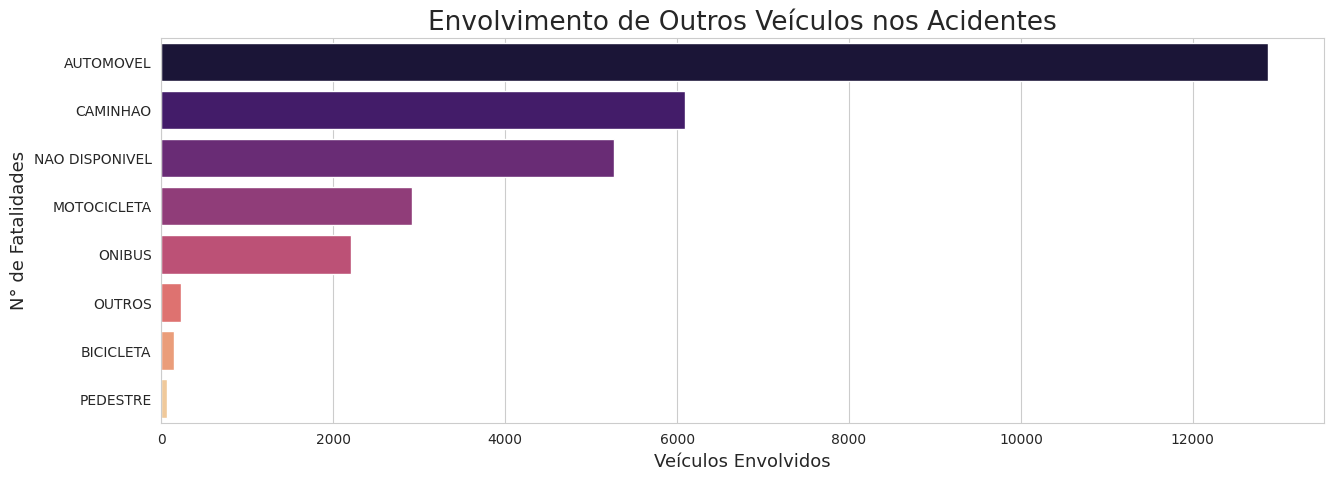

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.countplot(y = 'Outro Veículo Envolvido',
              order=df['Outro Veículo Envolvido'].value_counts().index,
              palette = 'magma',
              data=df)
plt.xlabel('Veículos Envolvidos',fontsize=13)
plt.ylabel('N° de Fatalidades',fontsize=13)
plt.title('Envolvimento de Outros Veículos nos Acidentes',fontsize=19);

In [ ]:
#Porcentagem de cada veículo envolvido
round(df['Outro Veículo Envolvido'].value_counts()/df['Outro Veículo Envolvido'].value_counts().sum()*100,2)

AUTOMOVEL         33.17
NÃO HÁ            23.24
CAMINHAO          15.68
NAO DISPONIVEL    13.56
MOTOCICLETA        7.52
ONIBUS             5.67
OUTROS             0.60
BICICLETA          0.38
PEDESTRE           0.17
Name: Outro Veículo Envolvido, dtype: float64

In [ ]:
#Quando há acidente, qual a porcentagem?
df_remove_envolvido = df.loc[(df['Outro Veículo Envolvido'] == 'NÃO HÁ')]
df = df.drop(df_remove_envolvido.index)
round(df['Outro Veículo Envolvido'].value_counts()/df['Outro Veículo Envolvido'].value_counts().sum()*100,2)

AUTOMOVEL         43.22
CAMINHAO          20.43
NAO DISPONIVEL    17.66
MOTOCICLETA        9.80
ONIBUS             7.39
OUTROS             0.78
BICICLETA          0.50
PEDESTRE           0.22
Name: Outro Veículo Envolvido, dtype: float64

In [ ]:
df_remove_acidente = df.loc[(df['Tipo de acidente'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_acidente.index)

# Porcentagem do tipo de aciednte
round(df['Tipo de acidente'].value_counts()/df['Tipo de acidente'].value_counts().sum()*100,2)

COLISAO          49.40
ATROPELAMENTO    34.21
OUTROS            8.25
CHOQUE            8.14
NÃO HÁ            0.01
Name: Tipo de acidente, dtype: float64

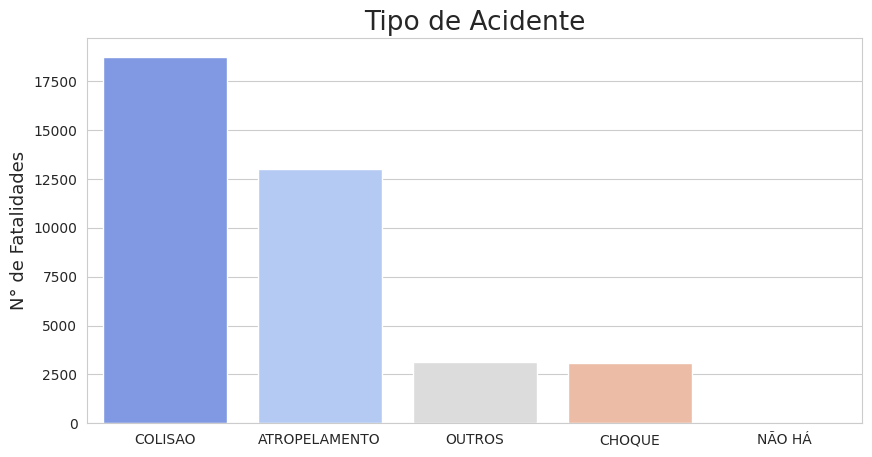

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x = 'Tipo de acidente',
              order = df['Tipo de acidente'].value_counts().index,
              palette = 'coolwarm',
              data =df)
plt.ylabel('N° de Fatalidades',fontsize=13)
plt.xlabel('')
plt.title('Tipo de Acidente',fontsize=19);

In [ ]:
df_remove_sub_acidente = df.loc[(df['Sub Tipo do Acidente'] == 'NAO DISPONIVEL')]
df = df.drop(df_remove_sub_acidente.index)
(df['Sub Tipo do Acidente'].value_counts()/df['Sub Tipo do Acidente'].value_counts().sum()*100,2)

(FRONTAL                                  22.781229
 CRUZANDO A VIA                           19.458620
 TRASEIRA                                 16.330153
 LATERAL                                  12.020191
 TRANSVERSAL                               7.510539
 ANDANDO NA VIA / ACOSTAMENTO              6.284668
 TOMBAMENTO VEÍCULO DE 2 RODAS             3.544486
 VEÍCULO ESTACIONADO                       2.651431
 CONDUTOR/PASSAGEIROS FORA DO VEÍCULO      2.091191
 NA CALÇADA                                1.752829
 ENGAVETAMENTO                             0.870868
 CAPOTAMENTO                               0.710007
 DEFENSA / BARREIRA                        0.643444
 OUTROS                                    0.637897
 POSTE                                     0.626803
 ANIMAL                                    0.471489
 MURO/PAREDE/TALUDE                        0.465942
 TOMBAMENTO VEÍCULO DE MAIS DE 2 RODAS     0.266252
 ÁRVORE                                    0.232971
 QUEDA (ÁGUA

# **CONCLUSÕES**

---



## Conclusão dos dados

Alguns dados relevantes:

*   Os homens representaram **82.3%** das mortes;

*   Os condutores corresponderam a **60.56%** das mortes;

*   Os condutores e passageiros costumam ser jovens, enquanto os pedestres costumam ser mais velhos;

*   As vias municipais tiveram mais mortes que as rodovias

*   O mês de março obteve o maior número de mortos;

*   **96.47%** dos acidentes fatais resultaram em morte no mesmo mês;

*   O município com mais mortes é a capital, com cerca de 8145 fatalidades nesse período de 8 anos, correspondendo a **16.3%**;

*   Ocorreram mais mortes diárias nos finais de semana do que dos dias de semana (**19,8%** das mortes totais no sábado e **19,4%** no domingo);


*   A noite se mostrou muito mais perigosa que os outros turnos do dia (**35,5%** das mortes ocorreram na noite);


*  Aproximadamente **81%** dos acidentes tinham outro veículo envolvido. E quando tinham, **43,5%** possuíam envolvimento de automóvel;


*   O tipo mais comum desses acidentes (**49,4%**) foi colisão, o segundo foi atropelamento(**34,2%**)

*    **22.7%** foram acidentes frontais, enquanto **19.4%** ocorreram em cruzamento de vias.




## Conclusão final
Ter conhecimento do que acontece no nosso dia-a-dia é essencial não só para compreendermos nossa sociedade, mas para nos sentirmos inseridos nela. Analisar os fenômenos (por mais trágicos que sejam) através de dados, gráficos e modelos faz parte dessa compreensão e, por isso, os dados devem estar claros e os gráficos coesos, pois precisam ser entendidos e pra isso precisam ser **entendíveis**.

Cabe aos cidadãos e aos órgãos públicos (mais a esses) o dever te conscientizar que o trânsito deve ser conduzido com responsabilidade. Porque educação no trânsito não se adquire apenas nas auto escolas, mas também em uma comunidade ciente da necessidade da seriedade do assunto.

Segundo o Observatório de Segurança Viária, 90% dos acidentes são relacionados ao comportamento do motorista. E não adianta apenas ter estradas novas, fiscalizações e carros mais seguros.

> *“Se houver uma falha humana, tanto a rodovia, quanto o veículo, eles estão ali para auxiliar e mitigar a lesão fatal ao ocupante. Se nós não trabalharmos a questão da educação, do comportamento da sociedade, nós vamos continuar a ter taxas elevadas de mortes no trânsito”*, afirma José Aurélio Ramalho.

https://www.onsv.org.br/90-dos-acidentes-sao-causados-por-falhas-humanas-alerta-observatorio/

